#Libarires and Functions

In [ ]:
! pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.3 which is incompatible.


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import random
import os
#import mediapipe as mp
from tqdm import tqdm
import shutil

In [ ]:
def rotateImage(rot_image, angle):
    # Calculate the center of the image
    image_center = tuple(np.array(rot_image.shape[1::-1]) / 2)

    # Create the rotation matrix
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)

    # Apply the rotation
    result = cv2.warpAffine(rot_image, rot_mat, rot_image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


def closeImage(image_3,filter_size_3=(3,3)):
    square_kernel = np.ones(filter_size_3, dtype=np.uint8)
    opening = cv2.morphologyEx(image_3, cv2.MORPH_CLOSE, square_kernel)
    return opening


def fillImage(f_image):
    filled_image=f_image.copy()
    zero_indices = np.where(filled_image == 0)
    non_zero_indices = np.where(filled_image != 0)
    filled_image[zero_indices] = np.random.choice(filled_image[non_zero_indices], size=len(zero_indices[0]))
    return filled_image
def sheareImage(image,shear_factor = 0.1):
  # Create the shear matrix
  shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
  # Apply the shear transformation
  sheared_image = cv2.warpAffine(image, shear_matrix, (image.shape[1], image.shape[0]))
  return sheared_image

In [ ]:
def adjust_brightness(image_path, target_mean=128):
    gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    current_mean = np.mean(gray_image)

    # Calculate the brightness adjustment factor
    brightness_factor = target_mean / current_mean

    # Apply the adjustment
    adjusted_image = np.clip(gray_image * brightness_factor, 0, 255).astype(np.uint8)
    return adjusted_image

In [ ]:
def count_imagesPrectinge(folder_path,total_files):
    """Counts the number of image files in a directory.

    Args:
        folder_path: The path to the directory containing images.

    Returns:
        An integer representing the number of image files found.
    """
    image_count = 0
    for filename in os.listdir(folder_path):
        # Check for common image extensions (modify as needed)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            image_count += 1
    if total_files > 0:
        percentage = (image_count / total_files) * 100
    else:
        percentage = 0.0

    return image_count, percentage

def count_images(directory_path):
    """
    Counts the number of image files (e.g., .jpg, .png) within a directory and its subdirectories.
    Args:
        directory_path (str): Path to the directory.

    Returns:
        int: Total number of image files.
    """
    image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']  # Add more extensions if needed
    image_count = 0

    for root, dirs, files in os.walk(directory_path):
        for filename in files:
            if any(filename.lower().endswith(ext) for ext in image_extensions):
                image_count += 1

    return image_count

In [ ]:
def copy_random_images(source_dir, dest_dir, percentage):
    """
    Copies a random percentage of images from the source directory to the destination directory.
    Args:
        source_dir (str): Path to the source directory containing images.
        dest_dir (str): Path to the destination directory.
        percentage (float): Percentage of images to copy (e.g., 0.1 for 10%).

    Returns:
        None
    """
    image_files = [file for file in os.listdir(source_dir) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]
    num_images_to_copy = int(len(image_files) * percentage)

    random_images = random.sample(image_files, num_images_to_copy)

    for image in random_images:
        src_path = os.path.join(source_dir, image)
        dest_path = os.path.join(dest_dir, image)
        shutil.move(src_path, dest_path)



In [ ]:
def copyAndRotateImages(source_path,dis_path,percentage,angle=10,check=False):
  image_files = [file for file in os.listdir(source_path) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

  num_images_to_copy = int(len(image_files) * percentage)

  random_images = random.sample(image_files, num_images_to_copy)

  name=num_images_to_copy
  for image_name in random_images:
    image=cv2.imread(os.path.join(source_path,image_name))

    rotated_image=rotateImage(image,angle)
    filled_image=fillImage(rotated_image)
    opend_image=closeImage(filled_image,filter_size_3=(3,1))
    opend_image=closeImage(opend_image,filter_size_3=(1,3))

    cv2.imwrite(os.path.join(dis_path,f'rotated_{name}.png'),opend_image)
    if check:
      os.remove(os.path.join(source_path,image_name))
    name-=1


#Clean The Dataset

In [ ]:
#copy the data
! cp /content/drive/MyDrive/Datasets/Final_Data.zip /content/
! unzip Final_Data.zip


In [ ]:
mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(min_detection_confidence=0.7)

my_sets = [ 'modifed_train']
classes = ['anger','sadness','disgust','fear']
folder_path="/content/content/raf_cleaned_for_mergining"
# Loop through sets
for files in os.listdir(folder_path):
    if files in my_sets:
        # Loop through each class
        for my_class in classes:
            print("")
            current_path = os.path.join('/content', f"ttt{files}")
            if not os.path.isdir(current_path):
                os.mkdir(current_path)
            #class writing dirictory
            CLASS_PATH = os.path.join(current_path, my_class)
            if not os.path.isdir(CLASS_PATH):
                os.mkdir(CLASS_PATH)
            reading_dir = os.path.join(folder_path, files, my_class)
            image_count_before = len(os.listdir(reading_dir))  # Count images before processing
            print(f"{files}: ({my_class}) Images before processing: {image_count_before}")

            counter = 0
            pbar = tqdm(os.listdir(reading_dir))
            for image_name in pbar:
                image_path = os.path.join(reading_dir, image_name)
                image = cv2.imread(image_path)
                image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
                image=cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
                results = face_detection.process(image)
                pbar.set_description(f"Preprocessing {image_name}")
                if results.detections:
                      proccesed_image=cv2.resize(image,(224,224),cv2.INTER_AREA)
                      name,_=os.path.splitext(image_name)
                      cv2.imwrite(img=proccesed_image,filename=os.path.join(CLASS_PATH,f"modifed_{name}.png"))
                      counter += 1
            pbar.close()
            print(f"Images after processing: {counter}")




modifed_train: (anger) Images before processing: 520


Preprocessing modifed_train_04501_aligned.jpg.jpg: 100%|██████████| 520/520 [00:10<00:00, 49.70it/s]


Images after processing: 468

modifed_train: (sadness) Images before processing: 1694


Preprocessing modifed_train_00345_aligned.jpg.jpg: 100%|██████████| 1694/1694 [00:33<00:00, 50.53it/s]


Images after processing: 1593

modifed_train: (disgust) Images before processing: 613


Preprocessing modifed_train_09490_aligned.jpg.jpg: 100%|██████████| 613/613 [00:14<00:00, 43.05it/s]


Images after processing: 573

modifed_train: (fear) Images before processing: 242


Preprocessing modifed_train_07289_aligned.jpg.jpg: 100%|██████████| 242/242 [00:06<00:00, 39.97it/s]

Images after processing: 234


In [ ]:
#copy the images to one file

for classes in os.listdir('/content/proccesed_modifed_test'):
  for image_name in os.listdir(os.path.join('/content/proccesed_modifed_test',classes)):
    shutil.copy(os.path.join('/content/proccesed_modifed_test',classes,image_name),os.path.join('/content/proccesed_my_data',classes))


In [ ]:
#disturb the data acrros all there sets :train,test,validation
for classes in os.listdir('/content/proccesed_my_data'):
  copy_random_images(os.path.join('/content/proccesed_my_data',classes),os.path.join('/content/proccesed_train_images',classes),1)


In [ ]:
#count the image in each class and it's percentage
folder_path='/content/proccesed_validation_images'
for my_clasess in os.listdir(folder_path):
  num,p=count_imagesPrectinge(os.path.join(folder_path,my_clasess),4143)
  print(f"{my_clasess} : {num} ({np.round(p,2)}%)")

anger : 445 (10.74%)
neutral : 1268 (30.61%)
surprise : 657 (15.86%)
disgust : 96 (2.32%)
fear : 115 (2.78%)
happiness : 880 (21.24%)
sadness : 682 (16.46%)


In [ ]:
count_images('/content/Final_Data')

42242

#**Anger Class**

In [ ]:
#Rotate the images
name=3534
source_path='/content/content/Final_Data/proccesed_train_images/anger'
dis_path='/content/augmentation/Rotated_Images/Rotated_Images_train/anger/anger_minus10'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  rotated_image=rotateImage(image,-10)
  filled_image=fillImage(rotated_image)
  opend_image=closeImage(filled_image,filter_size_3=(3,1))
  opend_image=closeImage(opend_image,filter_size_3=(1,3))
  cv2.imwrite(os.path.join(dis_path,f'rotated_{name}.png'),opend_image)
  name-=1
print('Done')

KeyboardInterrupt: 

In [ ]:
#Rotate the images
name=448
source_path='/content/content/Final_Data/proccesed_test_images/anger'
dis_path='/content/augmentation/Rotated_Images/Rotate_Images_test/anger/plus10'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  rotated_image=rotateImage(image,10)
  filled_image=fillImage(rotated_image)
  opend_image=closeImage(filled_image,filter_size_3=(3,1))
  opend_image=closeImage(opend_image,filter_size_3=(1,3))
  cv2.imwrite(os.path.join(dis_path,f'rotated_{name}.png'),opend_image)
  name-=1
print('Done')

In [ ]:
#Flip the images
name=3534
source_path='/content/content/Final_Data/proccesed_train_images/anger'
dis_path='/content/augmentation/Flipped_Images/Flipped_train/anger'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  flipped_image=cv2.flip(image,1)
  cv2.imwrite(os.path.join(dis_path,f'flipped_{name}.png'),flipped_image)
  name-=1
print('Train folder Done')

name=448
source_path='/content/content/Final_Data/proccesed_test_images/anger'
dis_path='/content/Flipped_Images/Flipped_test/anger'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  flipped_image=cv2.flip(image,1)
  cv2.imwrite(os.path.join(dis_path,f'flipped_{name}.png'),flipped_image)
  name-=1
print('Test folder Done')

#**Surprise Class**

In [ ]:
copy_random_images('/content/content/Final_Data/proccesed_test_images/surprise','/content/surprise',0.5)

In [ ]:
#Rotate the images
name=3534
source_path='/content/surprise'
dis_path='/content/augmentation/Rotated_Images/Rotated_Images_train/suprise/minus10'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  rotated_image=rotateImage(image,-10)
  filled_image=fillImage(rotated_image)
  opend_image=closeImage(filled_image,filter_size_3=(3,1))
  opend_image=closeImage(opend_image,filter_size_3=(1,3))
  cv2.imwrite(os.path.join(dis_path,f'rotated_{name}.png'),opend_image)
  name-=1
print('Done')

Done


In [ ]:
#Rotate the images
name=334
source_path='/content/surprise'
dis_path='/content/augmentation/Rotated_Images/Rotate_Images_test/surprise/minus10'
for image_name in os.listdir(source_path):
  image=cv2.imread(os.path.join(source_path,image_name))
  rotated_image=rotateImage(image,-10)
  filled_image=fillImage(rotated_image)
  opend_image=closeImage(filled_image,filter_size_3=(3,1))
  opend_image=closeImage(opend_image,filter_size_3=(1,3))
  cv2.imwrite(os.path.join(dis_path,f'rotated_{name}.png'),opend_image)
  name-=1
print('Done')

Done


#**Sadnees Class**

In [ ]:
#rotate +10 deggre
src='/content/content/Final_Data/proccesed_train_images/sadness'
dis='/content/content/augmentation/Rotated_Images/Rotated_Images_train/sadnees/minus10'
copyAndRotateImages(src,dis,0.35,angle=-10)

In [ ]:
name=2509
for image in os.listdir(src):
  img=cv2.imread(os.path.join(src,image))
  flipped_image=cv2.flip(img,1)
  cv2.imwrite(os.path.join(dis,f"flipped_{name}.png"),flipped_image)
  name-=1

In [ ]:
src='/content/content/Final_Data/proccesed_test_images/sadness'
dis='/content/content/augmentation/Rotated_Images/Rotate_Images_test/sadnees/plus10'
dis_1='/content/content/augmentation/Rotated_Images/Rotate_Images_test/sadnees/minus10'

dis_2='/content/content/augmentation/Flipped_Images/Flipped_test/sadnees'

copyAndRotateImages(src,dis,0.35,angle=10)
copyAndRotateImages(src,dis_1,0.35,angle=-10)

name=len(os.listdir(src))
for image in os.listdir(src):
  img=cv2.imread(os.path.join(src,image))
  flipped_image=cv2.flip(img,1)
  cv2.imwrite(os.path.join(dis_2,f"flipped_{name}.png"),flipped_image)
  name-=1


321

#**Fear Class**

In [ ]:
# rotate the images
src='/content/content/Final_Data/proccesed_train_images/fear'
dis_1='/content/content/augmentation/Rotated_Images/Rotated_Images_train/fear/plus10'
dis_2='/content/content/augmentation/Rotated_Images/Rotated_Images_train/fear/minus10'


copyAndRotateImages(src,dis_1,1,10,False)
copyAndRotateImages(src,dis_2,1,-10,False)

In [ ]:
#flip the images
dis='/content/content/augmentation/Flipped_Images/Flipped_train/fear'
distanations=[dis_1,dis_2,src]
classe=3
for dist in distanations:
    print(dist)
    name=1042
    for image in os.listdir(dist):
      img=cv2.imread(os.path.join(dist,image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(dis,f"flipped_{classe}{name}.png"),flipped_image)
      name-=1
    classe-=1

/content/content/augmentation/Rotated_Images/Rotated_Images_train/fear/plus10
/content/content/augmentation/Rotated_Images/Rotated_Images_train/fear/minus10
/content/content/Final_Data/proccesed_train_images/fear


In [ ]:
# rotate the images
src='/content/content/Final_Data/proccesed_test_images/fear'
dis_1='/content/content/augmentation/Rotated_Images/Rotate_Images_test/fear/minus10'
dis_2='/content/content/augmentation/Rotated_Images/Rotate_Images_test/fear/plus10'


copyAndRotateImages(src,dis_1,1,10,False)
copyAndRotateImages(src,dis_2,1,-10,False)

#flip the images
dis='/content/content/augmentation/Flipped_Images/Flipped_test/fear'
distanations=[dis_1,dis_2,src]
classe=3
for dist in distanations:
    print(dist)
    name=1042
    for image in os.listdir(dist):
      img=cv2.imread(os.path.join(dist,image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(dis,f"flipped_{classe}{name}.png"),flipped_image)
      name-=1
    classe-=1

/content/content/augmentation/Rotated_Images/Rotate_Images_test/fear/minus10
/content/content/augmentation/Rotated_Images/Rotate_Images_test/fear/plus10
/content/content/Final_Data/proccesed_test_images/fear


In [ ]:
#Change contrast
src='/content/content/Final_Data/proccesed_train_images/fear'
dis='/content/content/content/augmentation/Bright_Images/fear'
name=1042
for image_name in os.listdir(src):
  image=adjust_brightness(os.path.join(src,image_name),156)
  cv2.imwrite(os.path.join(dis,f"bright_{name}.png"),image)
  name-=1

In [ ]:
src='/content/content/content/augmentation/Flipped_Images/Flipped_train/fear'
dis='/content/content/content/augmentation/Bright_Images/fear'
name=2706
for image_name in os.listdir(src):
  print(image_name)

  image=adjust_brightness(os.path.join(src,image_name),156)
  cv2.imwrite(os.path.join(dis,f"brightF_{name}.png"),image)
  name-=1
  if name==0:
    break

#**Disgust Class**

In [ ]:
src='/content/content/augmentation/Rotated_Images'
my_class='disgust'
for my_file in os.listdir(src):
  for my_file_1 in os.listdir(os.path.join(src,my_file)):
    if os.path.exists(os.path.join(src,my_file,my_class)):
      pass
    else:
      os.mkdir(os.path.join(src,my_file,my_class))
    for my_class_1 in os.path.join(src,my_file,my_class):
      if not os.path.exists(os.path.join(src,my_file,my_class,'minus10')):
        os.mkdir(os.path.join(src,my_file,my_class,'minus10'))
      elif not os.path.exists(os.path.join(src,my_file,my_class,'plus10')):
        os.mkdir(os.path.join(src,my_file,my_class,'plus10'))


In [ ]:
src='/content/content/Final_Data/proccesed_train_images/disgust'
dis='/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust'
for my_file in os.listdir(dis):
  if my_file=='minus10':
    copyAndRotateImages(src,os.path.join(dis,'minus10'),1,-10)
  elif my_file=='plus10':
    copyAndRotateImages(src,os.path.join(dis,'plus10'),1,10)

In [ ]:
distantion='/content/content/augmentation/Flipped_Images/Flipped_train/disgust'
dis_1='/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/minus10'
dis_2='/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/plus10'
sources=[dis_1,dis_2,src]
classe=3
for dist in sources:
    print(dist)
    name=1042
    for image in os.listdir(dist):
      img=cv2.imread(os.path.join(dist,image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(distantion,f"flipped_{classe}{name}.png"),flipped_image)
      name-=1
    classe-=1

/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/minus10
/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/plus10
/content/content/Final_Data/proccesed_train_images/disgust


In [ ]:
src='/content/content/Final_Data/proccesed_test_images/disgust'
dis='/content/content/augmentation/Rotated_Images/Rotate_Images_test/disgust'
for my_file in os.listdir(dis):
  if my_file=='minus10':
    copyAndRotateImages(src,os.path.join(dis,'minus10'),1,-10)
  elif my_file=='plus10':
    copyAndRotateImages(src,os.path.join(dis,'plus10'),1,10)

In [ ]:
# @title Default title text
distantion='/content/content/augmentation/Flipped_Images/Flipped_test/disgust'
dis_1='/content/content/augmentation/Rotated_Images/Rotate_Images_test/disgust/minus10'
dis_2='/content/content/augmentation/Rotated_Images/Rotate_Images_test/disgust/plus10'
sources=[dis_1,dis_2,src]
classe=3
for dist in sources:
    print(dist)
    name=1042
    for image in os.listdir(dist):
      img=cv2.imread(os.path.join(dist,image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(distantion,f"flipped_{classe}{name}.png"),flipped_image)
      name-=1
    classe-=1

/content/content/augmentation/Rotated_Images/Rotate_Images_test/disgust/minus10
/content/content/augmentation/Rotated_Images/Rotate_Images_test/disgust/plus10
/content/content/Final_Data/proccesed_test_images/disgust


In [ ]:
#Change contrast
src='/content/content/Final_Data/proccesed_train_images/disgust'
src_1='/content/content/content/augmentation/Flipped_Images/Flipped_train/disgust'
src_2='/content/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/minus10'
src_3='/content/content/content/augmentation/Rotated_Images/Rotated_Images_train/disgust/plus10'
dis='/content/content/content/augmentation/Bright_Images/disgust'
name=4650
my_class=8
srcs=[src,src_1,src_2,src_3]
for src in srcs:
  for image_name in os.listdir(src):
    image=adjust_brightness(os.path.join(src,image_name),156)
    cv2.imwrite(os.path.join(dis,f"bright_{my_class}_{name}.png"),image)
    name-=1
  my_class-=1


In [ ]:
src='/content/content/content/augmentation/Flipped_Images/Flipped_train/fear'
dis='/content/content/content/augmentation/Bright_Images/fear'
name=2706
for image_name in os.listdir(src):
  print(image_name)

  image=adjust_brightness(os.path.join(src,image_name),156)
  cv2.imwrite(os.path.join(dis,f"brightF_{name}.png"),image)
  name-=1
  if name==0:
    break

#**Happy Class**

In [ ]:
src='/content/content/augmentation/Rotated_Images'
my_class='happiness'
for my_file in os.listdir(src):
  for my_file_1 in os.listdir(os.path.join(src,my_file)):
    if os.path.exists(os.path.join(src,my_file,my_class)):
      pass
    else:
      os.mkdir(os.path.join(src,my_file,my_class))
    for my_class_1 in os.path.join(src,my_file,my_class):
      if not os.path.exists(os.path.join(src,my_file,my_class,'minus10')):
        os.mkdir(os.path.join(src,my_file,my_class,'minus10'))
      elif not os.path.exists(os.path.join(src,my_file,my_class,'plus10')):
        os.mkdir(os.path.join(src,my_file,my_class,'plus10'))


In [ ]:
src='/content/content/Final_Data/proccesed_train_images/happiness'
dis='/content/content/augmentation/Rotated_Images/Rotated_Images_train/happiness'
for my_file in os.listdir(dis):
  if my_file=='minus10':
    copyAndRotateImages(src,os.path.join(dis,'minus10'),0.12164,-10,True)
  elif my_file=='plus10':
    copyAndRotateImages(src,os.path.join(dis,'plus10'),0.12164,10,True)

In [ ]:
name=889
distantion='/content/content/augmentation/Flipped_Images/Flipped_train/happiness'
for my_image in os.listdir('/content/content/Final_Data/proccesed_train_images/happiness'):
      print(my_image)
      img=cv2.imread(os.path.join(src,my_image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(distantion,f"flipped_{name}.png"),flipped_image)
      name-=1
      if name==0:
        break

In [ ]:
src='/content/content/Final_Data/proccesed_test_images/happiness'
dis='/content/content/augmentation/Rotated_Images/Rotate_Images_test/happiness'
for my_file in os.listdir(dis):
  if my_file=='minus10':
    copyAndRotateImages(src,os.path.join(dis,'minus10'),0.12164,-10,True)
  elif my_file=='plus10':
    copyAndRotateImages(src,os.path.join(dis,'plus10'),0.12164,10,True)

In [ ]:
name=50
distantion='/content/content/augmentation/Flipped_Images/Flipped_test/happiness'
for my_image in os.listdir('/content/content/Final_Data/proccesed_test_images/happiness'):
      img=cv2.imread(os.path.join(src,my_image))
      flipped_image=cv2.flip(img,1)
      cv2.imwrite(os.path.join(distantion,f"flipped_{name}.png"),flipped_image)
      name-=1
      if name==0:
        break

#my code

In [ ]:
count_images('/content/content/Final_Data')

42242

In [ ]:
!cp -r /content/drive/MyDrive/Datasets/Final_Data.zip /content/
!unzip Final_Data.zip

In [ ]:
! cp /content/drive/MyDrive/Datasets/augmentation_Done.zip /content/
! unzip augmentation_Done.zip

In [ ]:
!zip -r /content/augmentation_Done.zip /content/content/content/augmentation
! cp /content/augmentation_Done.zip /content/drive/MyDrive/Datasets

In [ ]:
shutil.rmtree('/content/content/augmentation/Flipped_Images/Flipped_train/fear')

In [ ]:
src='/content/content/content/augmentation/Rotated_Images/Rotated_Images_train'

for my_class in os.listdir(src):
  for my_file in os.listdir(os.path.join(src,my_class)):
    if my_file=='minus10':
      for image_name in os.listdir(os.path.join(src,my_class,my_file)):
        old_name=os.path.join(src,my_class,my_file,image_name)
        new_name=os.path.join(src,my_class,my_file,f"m_{image_name}")
        os.rename(old_name,new_name)
    elif my_file=='plus10':
      for image_name in os.listdir(os.path.join(src,my_class,my_file)):
        old_name=os.path.join(src,my_class,my_file,image_name)
        new_name=os.path.join(src,my_class,my_file,f"p_{image_name}")
        os.rename(old_name,new_name)
    elif my_file=='minus10_flipped':
      for image_name in os.listdir(os.path.join(src,my_class,my_file)):
        old_name=os.path.join(src,my_class,my_file,image_name)
        new_name=os.path.join(src,my_class,my_file,f"mf_{image_name}")
        os.rename(old_name,new_name)

In [ ]:
dis="/content/content/Final_Data"
src='/content/content/content/augmentation/Rotated_Images'
rotate=['Rotated_Images_train','Rotated_Images_test']
for name in os.listdir(dis):
  if "test" in name:
    for my_class in os.listdir(os.path.join(dis,name)):
      if my_class!='neutral':
        for folders in os.listdir(os.path.join(src,rotate[1],my_class)):
            copy_random_images(os.path.join(src,rotate[1],my_class,folders),os.path.join(dis,name,my_class),1)
  if 'train' in name:
    for my_class in os.listdir(os.path.join(dis,name)):
      if my_class!='neutral':
        for folders in os.listdir(os.path.join(src,rotate[0],my_class)):
            copy_random_images(os.path.join(src,rotate[0],my_class,folders),os.path.join(dis,name,my_class),1)

In [ ]:
dis="/content/content/Final_Data"
src='/content/content/content/augmentation/Flipped_Images'
train=['happiness','anger','fear','disgust']
test=['happiness','anger','fear','disgust','sadness']
rotate=['Flipped_train','Flipped_test']
for name in os.listdir(dis):
  if "test" in name:
    for my_class in os.listdir(os.path.join(dis,name)):
      if my_class in test:

            copy_random_images(os.path.join(src,rotate[1],my_class),os.path.join(dis,name,my_class),1)
  if 'train' in name:
    for my_class in os.listdir(os.path.join(dis,name)):
      if my_class in train:
            copy_random_images(os.path.join(src,rotate[0],my_class),os.path.join(dis,name,my_class),1)

In [ ]:
dis="/content/content/Final_Data"
src='/content/content/content/augmentation/Bright_Images'
train=['fear','disgust']
for name in os.listdir(dis):
  if 'train' in name:
    for my_class in os.listdir(os.path.join(dis,name)):
      if my_class in train:
          copy_random_images(os.path.join(src,my_class),os.path.join(dis,name,my_class),1)

In [ ]:
count_images('/content/content/Final_Data')

87145

In [ ]:
print(os.path.join(src,rotate[1],my_class,folders))

/content/content/content/augmentation/Rotated_Images/Rotated_Images_test/sadness/.ipynb_checkpoints


In [ ]:
! zip -r /content/Final_Data_augmented.zip /content/content/Final_Data
! cp /content/Final_Data_augmented.zip /content/drive/MyDrive/Datasets

In [ ]:
! cp /content/drive/MyDrive/Datasets/Final_Data_DONE_1.zip /content/
! unzip Final_Data_DONE_1.zip

In [ ]:
!unzip /content/my_data.zip

Archive:  /content/my_data.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/my_data.zip or
        /content/my_data.zip.zip, and cannot find /content/my_data.zip.ZIP, period.


In [ ]:
! cp /content/drive/MyDrive/Datasets/additional_data.zip /content
! unzip additional_data.zip

Streaming output truncated to the last 5000 lines.
 extracting: my_data/angry/20820.jpg  
 extracting: my_data/angry/20832.jpg  
 extracting: my_data/angry/20877.jpg  
 extracting: my_data/angry/20880.jpg  
 extracting: my_data/angry/20883.jpg  
 extracting: my_data/angry/20885.jpg  
 extracting: my_data/angry/20917.jpg  
 extracting: my_data/angry/2100.jpg  
 extracting: my_data/angry/21013.jpg  
 extracting: my_data/angry/2103.jpg  
 extracting: my_data/angry/21038.jpg  
 extracting: my_data/angry/21068.jpg  
 extracting: my_data/angry/21094.jpg  
 extracting: my_data/angry/21095.jpg  
 extracting: my_data/angry/21168.jpg  
 extracting: my_data/angry/21173.jpg  
 extracting: my_data/angry/21176.jpg  
 extracting: my_data/angry/21216.jpg  
 extracting: my_data/angry/21295.jpg  
 extracting: my_data/angry/21300.jpg  
 extracting: my_data/angry/21309.jpg  
 extracting: my_data/angry/21310.jpg  
 extracting: my_data/angry/21347.jpg  
 extracting: my_data/angry/21370.jpg  
 extracting: my

In [ ]:
src='/content/content/content/content/Final_Data_1/proccesed_test_images'
for my_file in os.listdir(src):
  print(my_file)
  print(count_images(os.path.join(src,my_file)))
  if my_file=='.ipynb_checkpoints':
    shutil.rmtree(os.path.join(src,my_file))

surprise
1004
fear
710
sadness
1342
happiness
1066
neutral
1199
anger
1344
disgust
460


In [ ]:
counter=0
src='/content/content/content/Final_Data_1/proccesed_train_images/fear'
for image_name in os.listdir(src):
  if 'flipped' in image_name:
    os.remove(os.path.join(src,image_name))
    counter+=1
  if counter==1:
    break
print(counter)

1


In [ ]:
count_images('/content/content/content/content/augmentation/Rotated_Images/Rotated_Images_train/anger/anger_plus10')

3534

In [ ]:
!zip -r /content/content/content/Final_Data_DONE_1.zip /content/content/content/Final_Data_1
!cp /content/content/content/Final_Data_DONE_1.zip /content/drive/MyDrive/Datasets

Streaming output truncated to the last 5000 lines.
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0001645.png (deflated 22%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0021147.png (deflated 24%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0002036.png (deflated 23%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0013206.png (deflated 23%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0023497.png (deflated 21%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0011058.png (deflated 24%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0008564.png (deflated 22%)
  adding: content/content/content/Final_Data_1/proccesed_train_images/neutral/modifed_fer0018647.png (deflated 22%)
  adding: content/con

In [ ]:
! cp /content/content/content/Final_Data_DONE_1.zip /content/drive/MyDrive

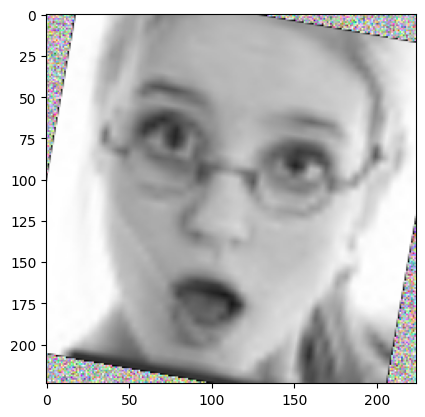

In [ ]:
x=0
for img in os.listdir('/content/my_data/suprise'):
  x=x+1
  if x==3:
    image=cv2.imread(os.path.join('/content/my_data/suprise',img))
    image=cv2.resize(image,(224,224))
    image=rotateImage(image,-10)
    image=fillImage(image)
  #  image=closeImage(image)
    plt.imshow(image)
    plt.show()
    break